<a href="https://colab.research.google.com/github/ardharaja12650/STKI/blob/main/Klasifikasi_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengunggah file dari penyimpanan lokal ke Google Colab
from google.colab import files

uploaded = files.upload()

# Import library yang diperlukan
import numpy as np
import pandas as pd
from scipy import stats
import squarify as sq
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# Menentukan nama file yang diunggah
nama_file = 'top50.csv'  # Ganti dengan nama file yang sebenarnya

# Membaca dataset menggunakan pandas dengan menentukan encoding
df = pd.read_csv(nama_file, encoding='latin1')

# Contoh: Menampilkan lima baris pertama dataset
print(df.head())


Saving top50.csv to top50 (3).csv
   Unnamed: 0                       Track.Name    Artist.Name           Genre  \
0           1                         Señorita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11       

In [ ]:
filename='top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
print(df.shape)

(50, 14)


In [ ]:
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
df.isnull().sum()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [ ]:
print(df.dtypes)

Unnamed: 0           int64
track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [ ]:
# Klasifikasi genre
print(type(df['Genre']))
popular_genre=df.groupby('Genre').size().unique
print(popular_genre)
genre_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


In [ ]:
# Menghitung lagu dari artis pada dataset ini
print(df.groupby('artist_name').size())
popular_artist=df.groupby('artist_name').size()
print(popular_artist)
artist_list=df['artist_name'].values.tolist()


artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      

In [ ]:
df.isnull().sum()
df.fillna(0)

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


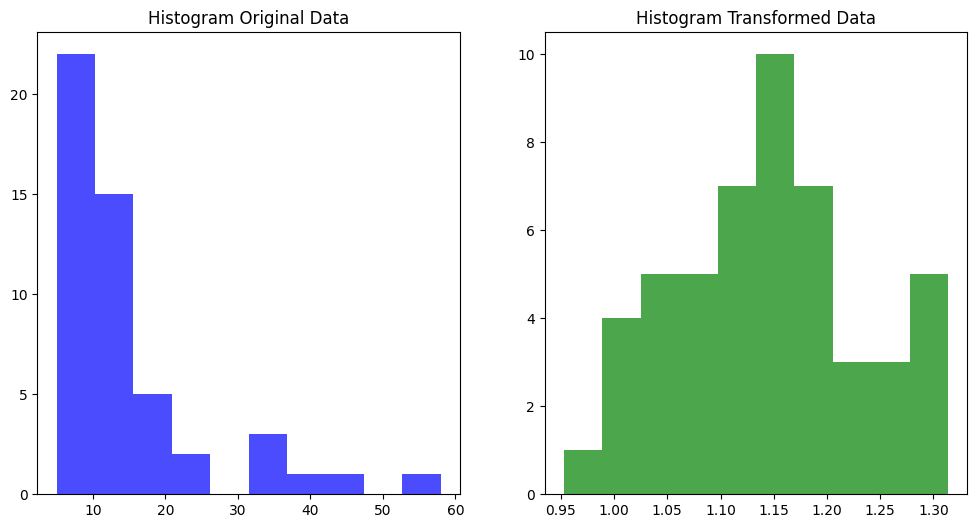

In [ ]:
# menghapus skewness dengan transformasi Box-Cox
transformed_liveness, lambda_value = stats.boxcox(df['Liveness'])
df['Liveness_Transformed'] = transformed_liveness

# membuat histogram untuk menampilkan perbedaan
plt.figure(figsize=(12, 6))

# histogram original data
plt.subplot(1, 2, 1)
plt.hist(df['Liveness'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram Original Data')

# histogram data yang telah di-transformasi
plt.subplot(1, 2, 2)
plt.hist(transformed_liveness, bins=10, color='green', alpha=0.7)
plt.title('Histogram Transformed Data')

plt.show()


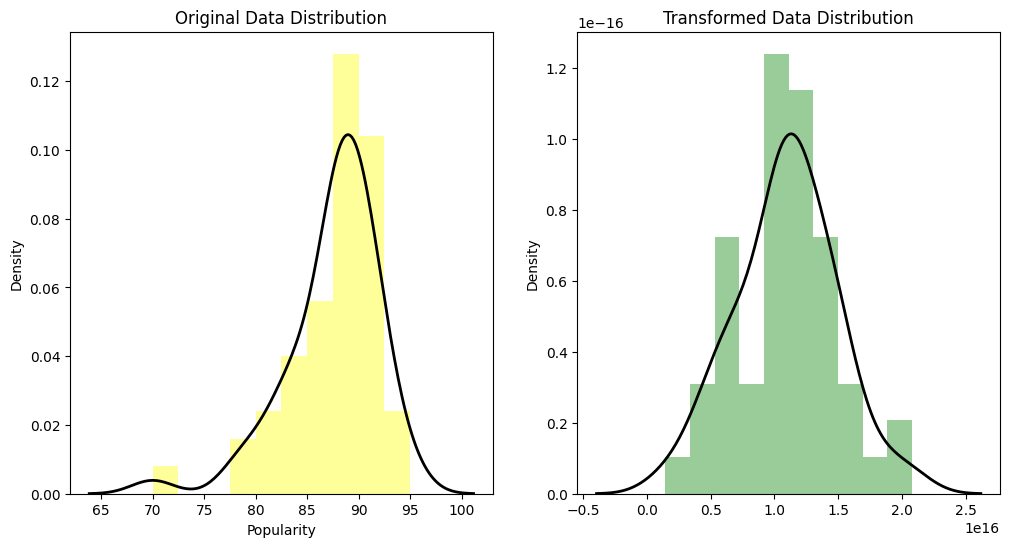

In [ ]:
# Menghapus skewness dengan transformasi Box-Cox
transformed_popularity, lambda_value = stats.boxcox(df['Popularity'])
df['Popularity_Transformed'] = transformed_popularity

# Menampilkan distribusi data asli dan data yang telah di-transformasi
plt.figure(figsize=(12, 6))

# KDE plot untuk data asli
plt.subplot(1, 2, 1)
sns.distplot(df['Popularity'], bins=10, kde=True, kde_kws={"color": "k", "lw": 2, "label": "KDE"}, color='yellow')
plt.title('Original Data Distribution')

# KDE plot untuk data yang telah di-transformasi
plt.subplot(1, 2, 2)
sns.distplot(transformed_popularity, bins=10, kde=True, kde_kws={"color": "k", "lw": 2, "label": "KDE"}, color='green')
plt.title('Transformed Data Distribution')

plt.show()


In [ ]:
# Set options untuk menampilkan lebar dan presisi
pd.set_option('display.width', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

# Menghitung korelasi menggunakan metode spearman
correlation = df.corr(method='spearman')
print(correlation)


                        Unnamed: 0  beats_per_minute  Energy  Danceability  Loudness(dB)  \
Unnamed: 0                   1.000            -0.263   0.132         0.053        -0.014   
beats_per_minute            -0.263             1.000   0.012        -0.092         0.014   
Energy                       0.132             0.012   1.000        -0.049         0.635   
Danceability                 0.053            -0.092  -0.049         1.000         0.009   
Loudness(dB)                -0.014             0.014   0.635         0.009         1.000   
Liveness                     0.102            -0.033   0.013        -0.261         0.114   
Valence                      0.113            -0.048   0.467         0.155         0.317   
Length                       0.045            -0.198   0.189        -0.079         0.165   
Acousticness                 0.058            -0.010  -0.211        -0.128        -0.040   
Speechiness                 -0.232             0.392  -0.035         0.104      

Text(0.5, 1.0, 'Genre vs Tracks')

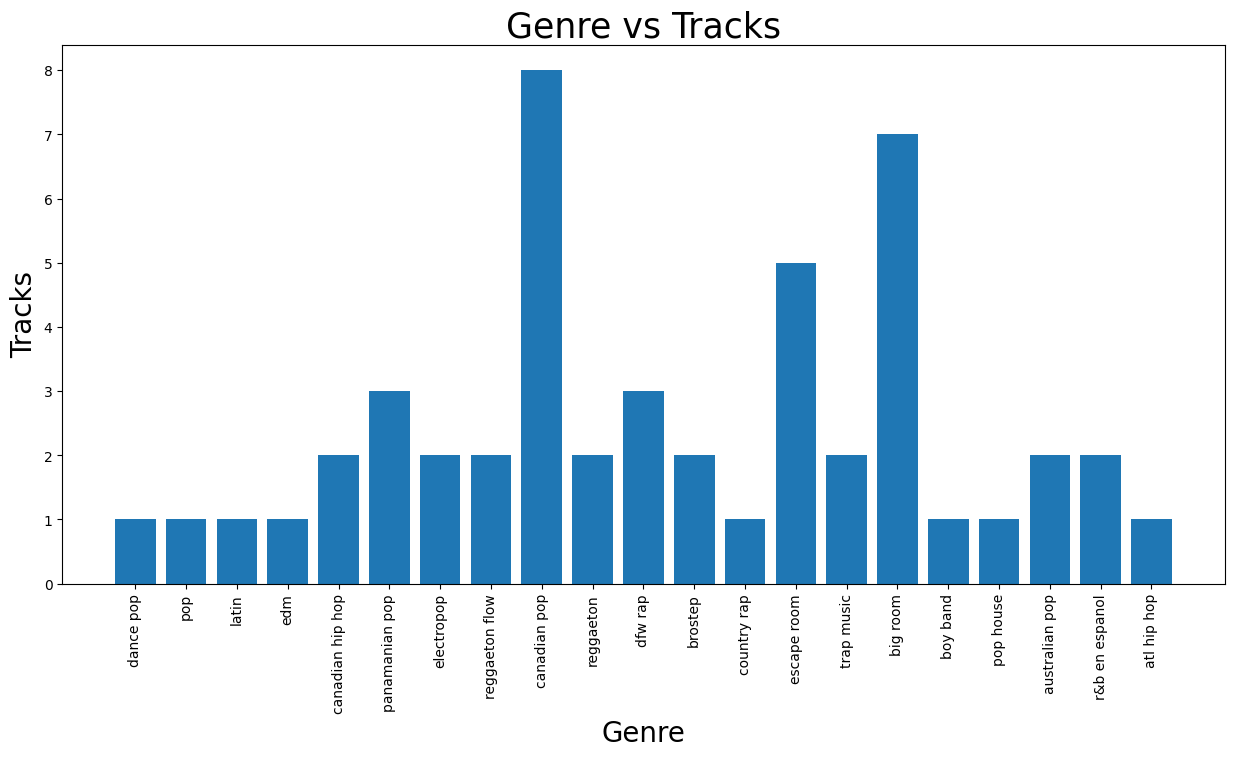

In [ ]:
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize = (15,7))
plt.bar(length, genre_groupby)
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Tracks', fontsize = 20)
plt.title('Genre vs Tracks', fontsize = 25)

<Axes: title={'center': 'Korelasi Heatmap'}>

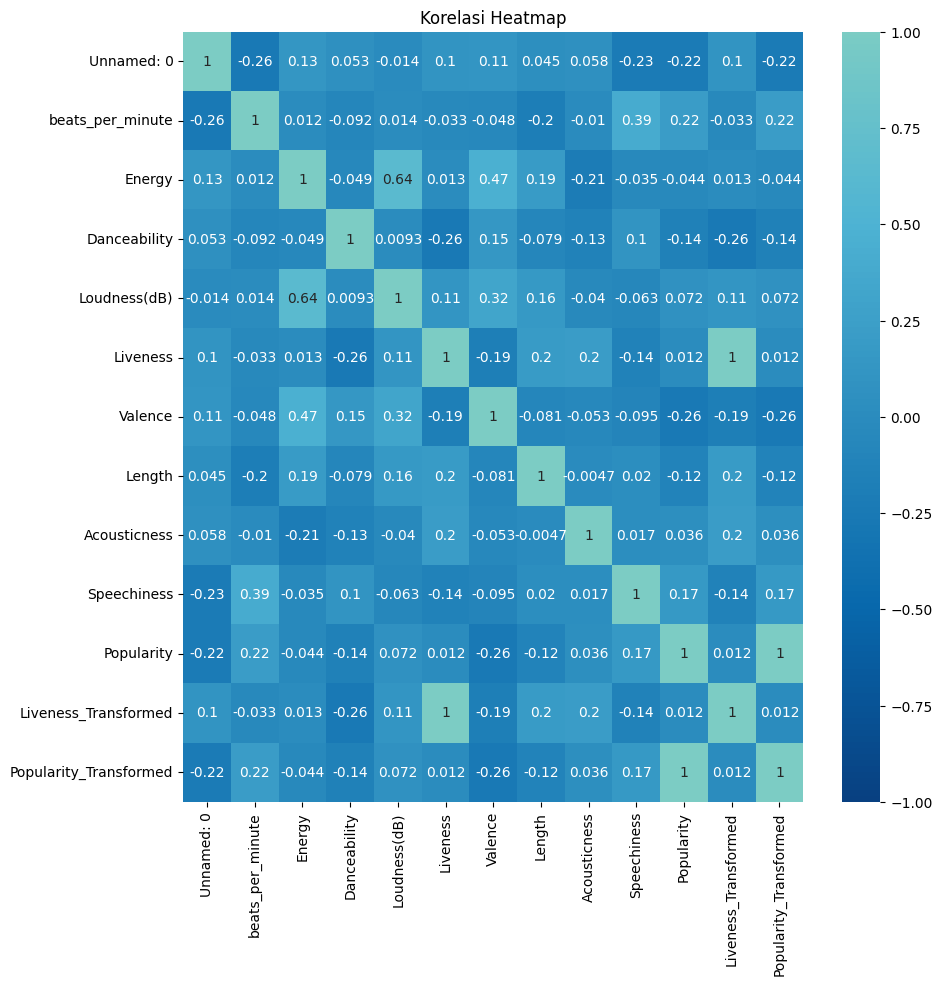

In [ ]:
# Korelasi Heatmap
plt.figure(figsize=(10,10))
plt.title('Korelasi Heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

Text(0.5, 1.0, 'Artis terhadap Jumlah Lagunya')

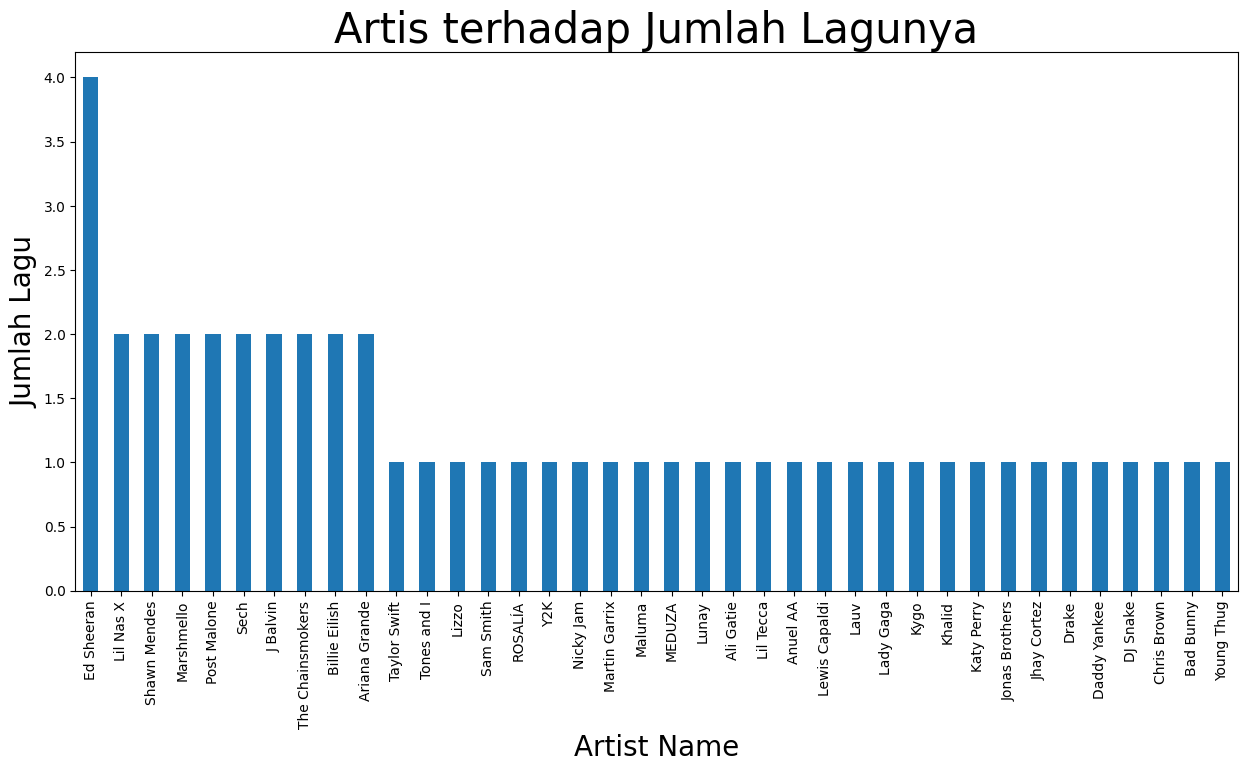

In [ ]:
fig = plt.figure(figsize = (15,7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Jumlah Lagu', fontsize = 20)
plt.title('Artis terhadap Jumlah Lagunya', fontsize = 30)

<Axes: xlabel='Energy', ylabel='Loudness(dB)'>

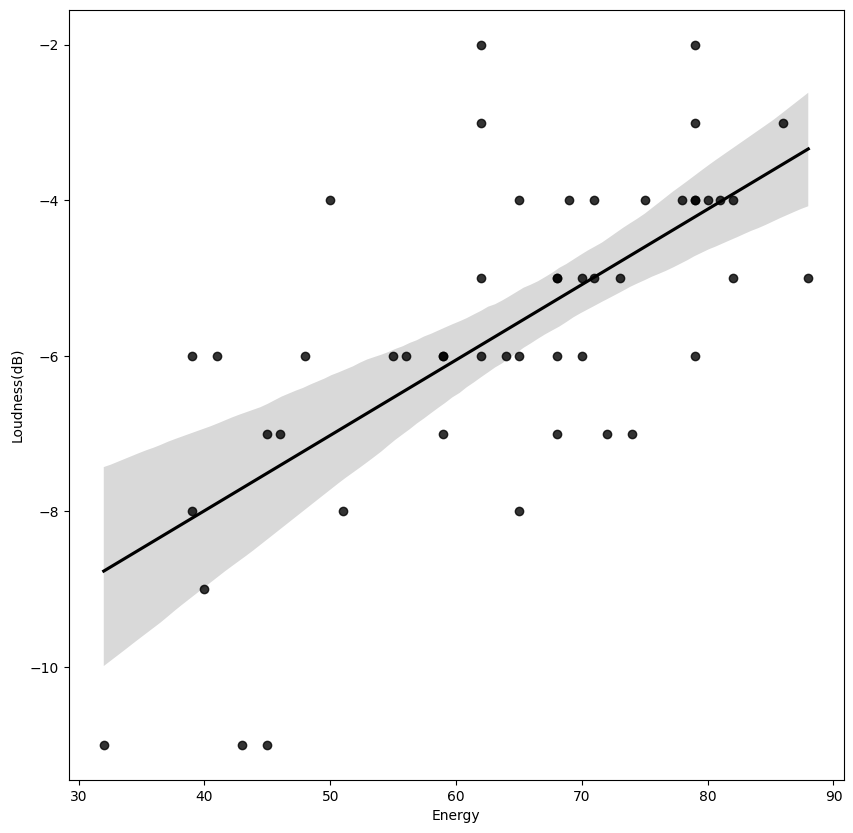

In [ ]:
# Analisis relasi Energy dan Loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='black')

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

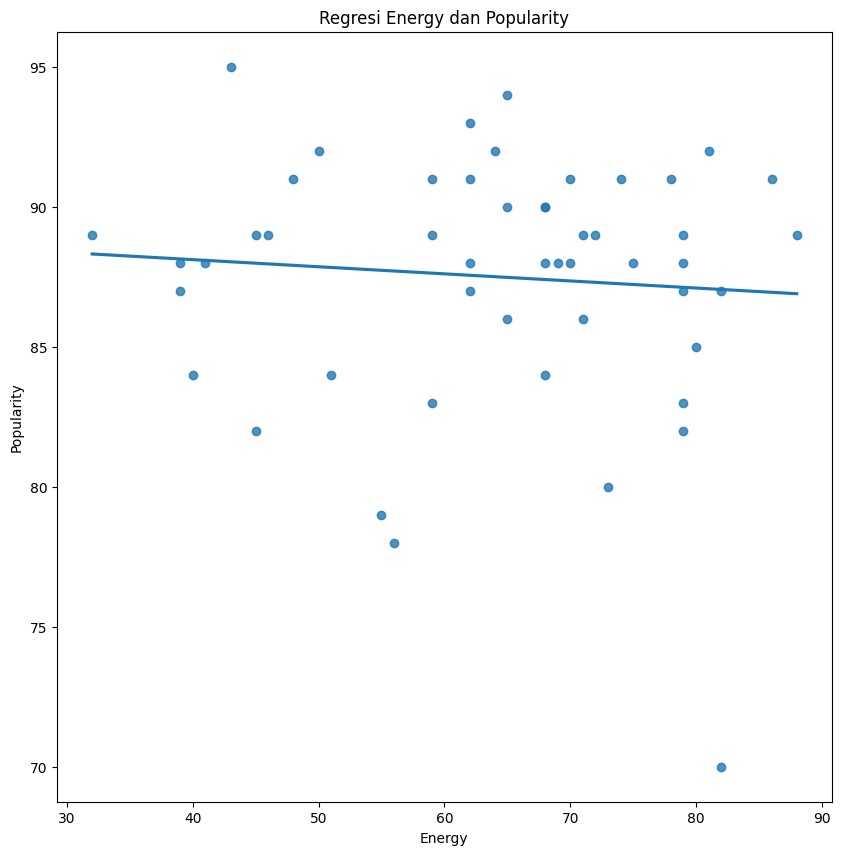

In [ ]:
fig=plt.subplots(figsize=(10,10))
plt.title('Regresi Energy dan Popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Energy,df.Popularity)

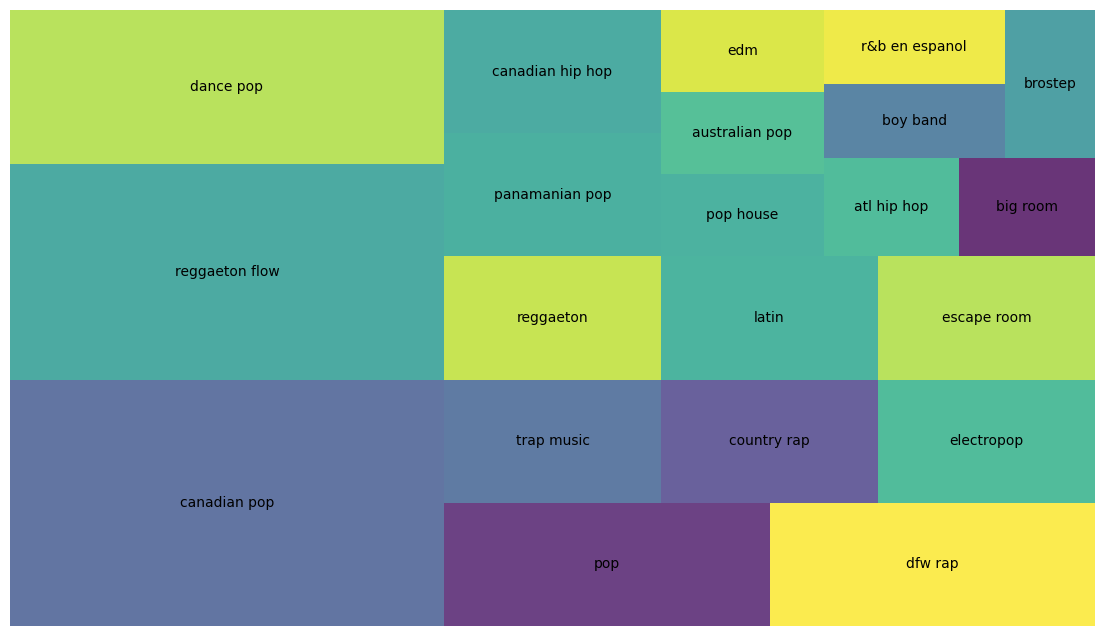

In [ ]:
plt.figure(figsize=(14,8))
sq.plot(sizes=df.Genre.value_counts(), label=df["Genre"].unique(), alpha=.8 )
plt.axis('off')
plt.show()

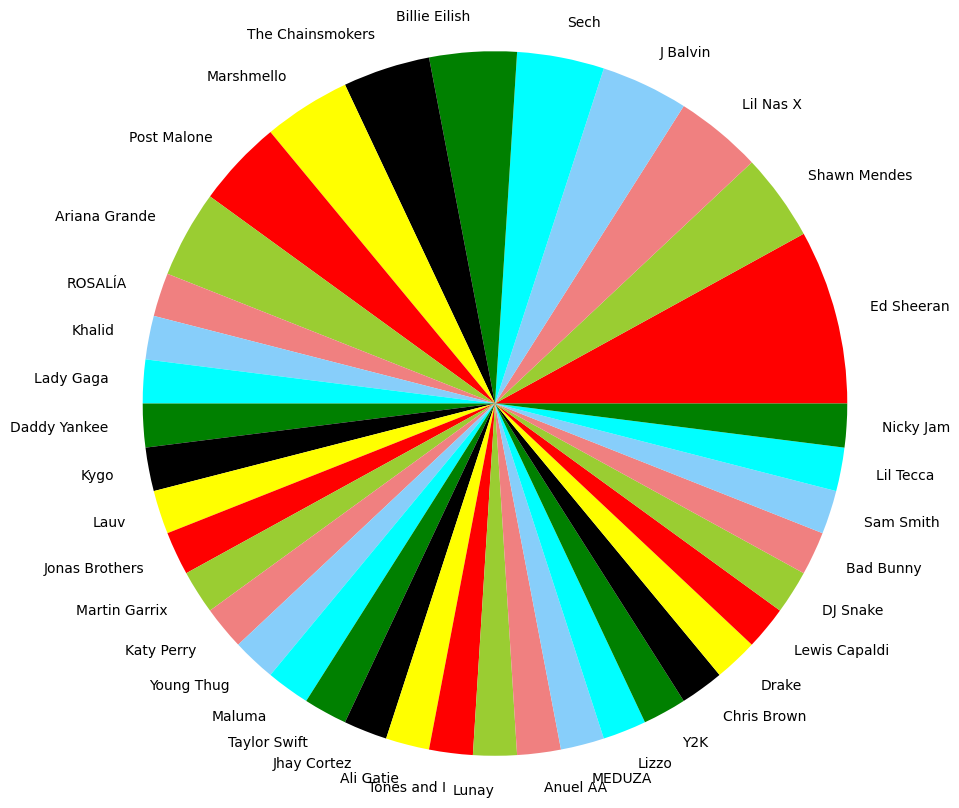

In [ ]:
# Pie charts
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
# Melatih dataset untuk Regresi Linear
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [ ]:
# Melatih dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# Regresi Linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

110.61516832482548
[-0.1426138  -0.12150299 -0.00994761  0.40862572 -0.06831988]


In [ ]:
# MEnampilkan data aktual dan prediksi
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       92     84.279
1       89     86.268
2       84     93.640
3       89     83.140
4       91     86.686
5       94     87.848
6       95     87.298
7       88     86.495
8       88     84.172
9       82     89.416
10      78     85.076
11      90     86.339
12      91     83.031
13      87     90.999
14      90     87.341


In [ ]:
# Mengecek akurasi dari regresi linear
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.4823079015225735
Mean Squared Error: 35.47216546165872
Root Mean Squared Error: 5.955851363294648


Text(0, 0.5, 'Tes')

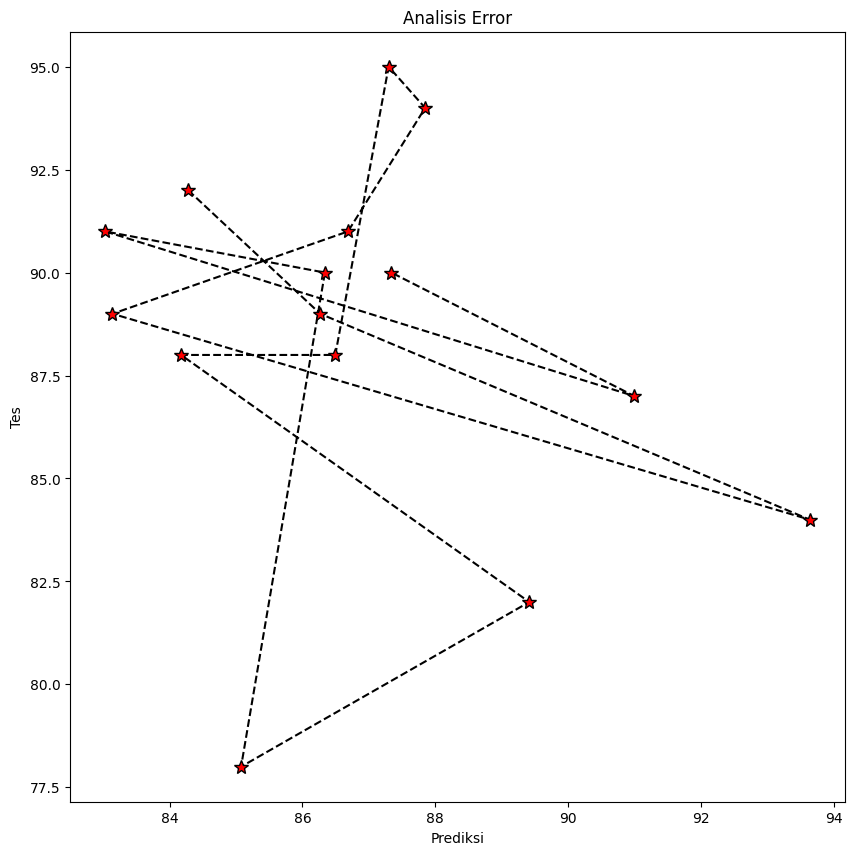

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Analisis Error')
plt.xlabel('Prediksi')
plt.ylabel('Tes')

In [ ]:
# Cross nilai Validasi
x=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_test, y_pred)-abs(mse_mean)
print(diff)

-23.943580636896762
11.528584824761957


In [ ]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values

In [ ]:
# Label encoding untuk fitur
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [ ]:
# Label Encoding untuk target
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,6
1,19
2,8
3,15
4,9
5,15
6,20
7,15
8,7
9,11


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

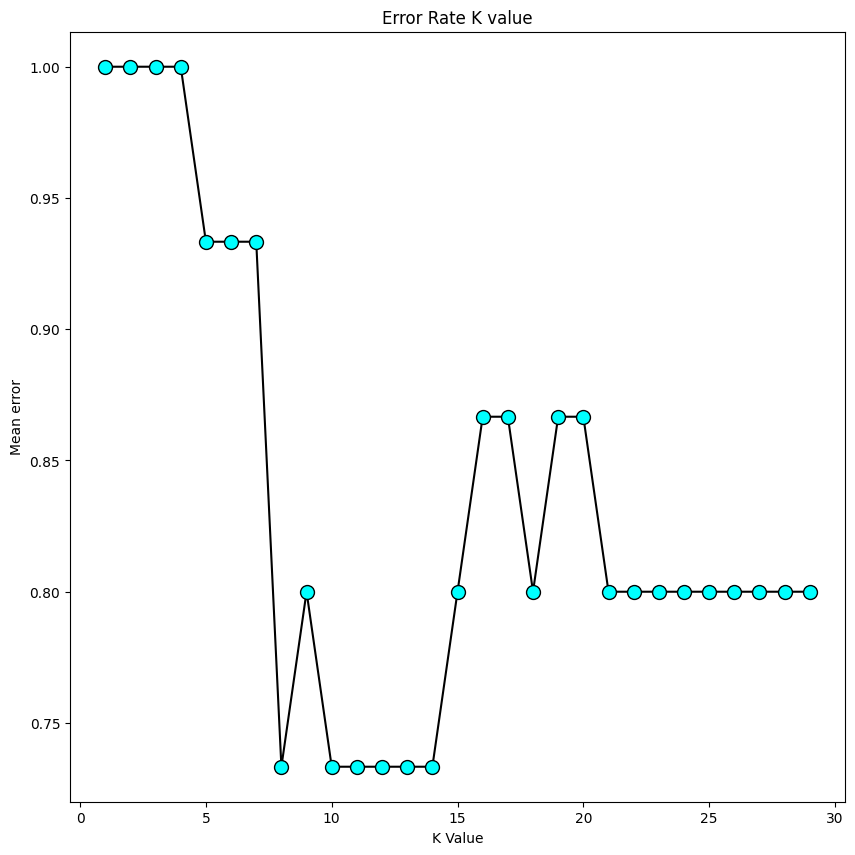

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='cyan',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [ ]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [ ]:
# Membuat tes dan melatih dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)


    Actual  Predicted
0       91         82
1       92         84
2       84         88
3       83         88
4       90         88
5       87         88
6       92         87
7       91         88
8       89         88
9       91         87
10      86         88
11      89         89
12      89         88
13      90         88
14      91         87


In [ ]:
# Menguji akurasi Naive Beyes
scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

11.868686868686867


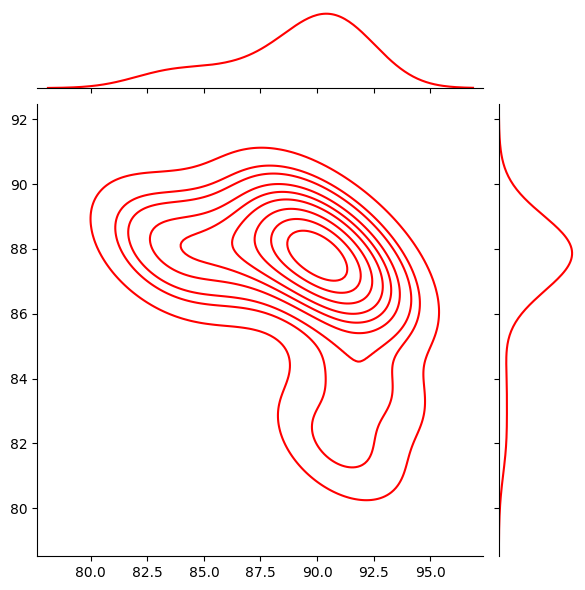

In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="r")

In [ ]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# Linear SVM model
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       82         82
1       94         94
2       86         86
3       90         88
4       79         79
5       88         89
6       87         87
7       91         82
8       85         85
9       88         88
10      83         83
11      88         88
12      91         91
13      82         82
14      84         84


In [ ]:
# Tes akurasi
scores=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

11.363636363636365


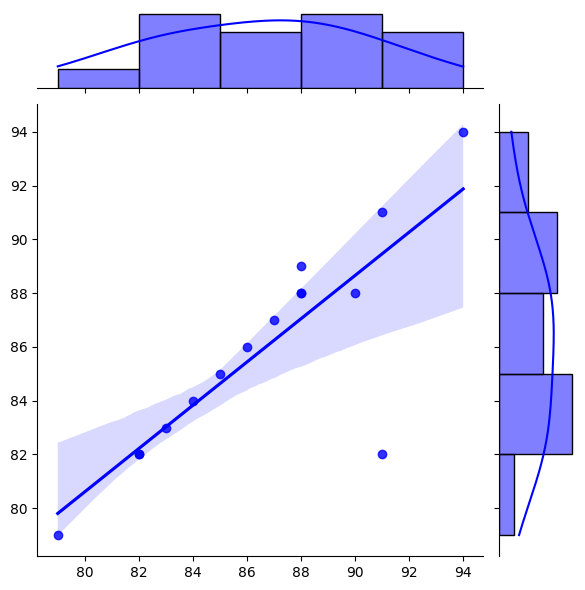

In [ ]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="b");